In [ ]:
!pip3 install yfinance pandas numpy matplotlib

/var/folders/h3/2t733p250yz3kvw4t8518bfr0000gn/T/ipykernel_19270/1161212849.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2023-01-01", end="2025-08-01")['Close']
[*********************100%***********************]  3 of 3 completed
/var/folders/h3/2t733p250yz3kvw4t8518bfr0000gn/T/ipykernel_19270/1161212849.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()    #return series


Mean Daily Return: 0.00278
Volatility: 0.04906
Sharpe Ratio: 0.06


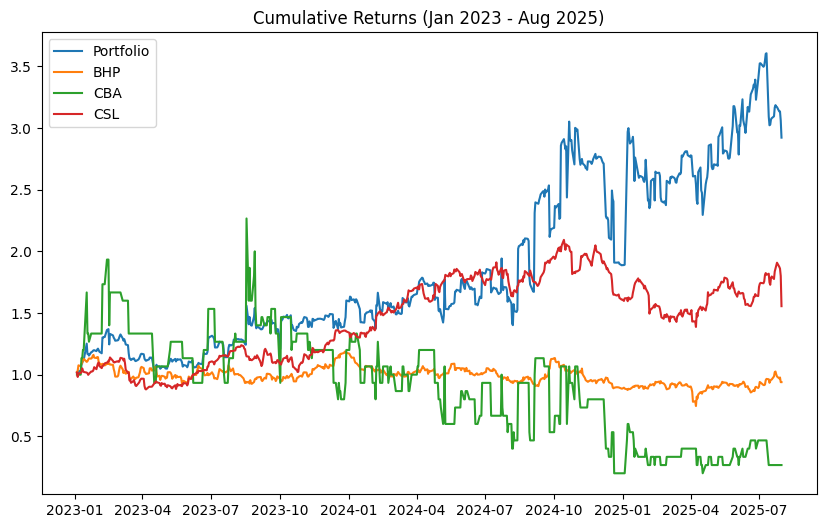

In [49]:
# Project 1: Stock Portfolio Analysis

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download the data from yahoo finance, for 4 yrs
tickers = ['CBA', 'BHP', 'CSL']
data = yf.download(tickers, start="2023-01-01", end="2025-08-01")['Close']

# Step 2: Calculate daily returns 
returns = data.pct_change().dropna()    #return series

# Step 3: Portfolio returns (equal weights)
weights = np.array([1/3, 1/3, 1/3])
portfolio_returns = (returns * weights).sum(axis=1)

# Step 4: Risk metrics
mean_return = portfolio_returns.mean()
volatility = portfolio_returns.std()
sharpe_ratio = (mean_return - 0.02/252) / volatility

print("Mean Daily Return:", round(mean_return,5))
print("Volatility:", round(volatility,5))
print("Sharpe Ratio:", round(sharpe_ratio,2))

# Step 5: Visualization
cumulative = (1 + portfolio_returns).cumprod()
plt.figure(figsize=(10,6))
plt.plot(cumulative, label="Portfolio")
for col in returns.columns:
    plt.plot((1 + returns[col]).cumprod(), label=col)
plt.legend()
plt.title("Cumulative Returns (Jan 2023 - Aug 2025)")
plt.show()
